# <font color='#d50283'>IT Academy - Data Science</font>
## Sprint 9 Tarea 1 - SkLearn_Train_Test 
### Luis Ortas


***
## Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

from scipy import stats
from itertools import zip_longest

# Configuration
%matplotlib inline
set_config(display='diagram')


In [2]:
df = pd.read_csv("DelayedFlights.csv",index_col=0)
df.head(5)

D:\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(columns=['FlightNum'], inplace=True)
df.drop(columns=['Year'], inplace=True)

In [4]:
# Renombramos columnas
df.rename(columns = {'DayofMonth': 'DayOfMonth'}, inplace = True)

# Cambiamos a boleeano.
df[['Cancelled','Diverted']] = df[['Cancelled','Diverted']].astype('bool')

In [5]:
df.describe()

,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayOfMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   TailNum            object 
 9   ActualElapsedTime  float64
 10  CRSElapsedTime     float64
 11  AirTime            float64
 12  ArrDelay           float64
 13  DepDelay           float64
 14  Origin             object 
 15  Dest               object 
 16  Distance           int64  
 17  TaxiIn             float64
 18  TaxiOut            float64
 19  Cancelled          bool   
 20  CancellationCode   object 
 21  Diverted           bool   
 22  CarrierDelay       float64
 23  WeatherDelay       float64
 24  NASDelay           float64
 25  SecurityDelay     

In [7]:
display(df.isna().sum().to_frame().T)

,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,0,0,0,7110,0,0,5,8387,...,7110,455,0,0,0,689270,689270,689270,689270,689270


In [8]:
#Separamos el data se en train y test. 70% 30%

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['ArrDelay']), df['ArrDelay'], test_size=0.3, random_state=42, shuffle=True)

In [9]:
print('X_train')
X_train.describe().T

X_train


,count,mean,std,min,25%,50%,75%,max
Month,1355730.0,6.112306,3.483593,1.0,3.0,6.0,9.0,12.0
DayOfMonth,1355730.0,15.764046,8.777341,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1355730.0,3.984186,1.996374,1.0,2.0,4.0,6.0,7.0
DepTime,1355730.0,1518.678266,450.591399,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1355730.0,1467.573254,424.924288,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1350709.0,1609.871719,548.692697,1.0,1316.0,1715.0,2031.0,2400.0
CRSArrTime,1355730.0,1634.380509,464.815096,0.0,1325.0,1706.0,2015.0,2400.0
ActualElapsedTime,1349822.0,133.292143,72.056963,15.0,80.0,116.0,165.0,1114.0
CRSElapsedTime,1355585.0,134.290592,71.337368,-25.0,82.0,116.0,165.0,660.0
AirTime,1349822.0,108.258927,68.645248,0.0,58.0,90.0,137.0,1091.0


In [10]:
print('X_test')
X_test.describe().T

X_test


,count,mean,std,min,25%,50%,75%,max
Month,581028.0,6.108308,3.480106,1.0,3.0,6.0,9.0,12.0
DayOfMonth,581028.0,15.728794,8.773736,1.0,8.0,16.0,23.0,31.0
DayOfWeek,581028.0,3.986324,1.995015,1.0,2.0,4.0,6.0,7.0
DepTime,581028.0,1518.197768,450.237696,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,581028.0,1467.237887,424.399373,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,578939.0,1610.768015,546.975726,1.0,1317.0,1715.0,2030.0,2400.0
CRSArrTime,581028.0,1633.860948,464.213740,0.0,1325.0,1705.0,2014.0,2400.0
ActualElapsedTime,578549.0,133.337875,72.067368,14.0,80.0,116.0,165.0,790.0
CRSElapsedTime,580975.0,134.331099,71.350990,1.0,82.0,116.0,165.0,660.0
AirTime,578549.0,108.319657,68.636495,0.0,58.0,90.0,137.0,654.0


Realizamos una función para comparar los atributos del conjunto de test y el de entrenamiento.

In [11]:
from termcolor import colored

def comparacion (train, test):
    '''Comparación describe de todos los atributos. Train i tests'''
    

   

#print(color.BOLD + 'Hello World !' + color.END)



    #Ver el resumen describe de cada variable.
    
    for v in train.columns:
            
        print (colored(v,'blue',attrs=['bold','underline','reverse']))
        print()
            
        print(colored('Train:',attrs=['bold']))
        print()
        print(train[v].describe())
        print('.................\n')
          
            
       
        print(colored('Test:',attrs=['bold']))
        print()
        print (test[v].describe(),2)
        print('__________________________\n')
            
         



comparacion(X_train, X_test)

Month

Train:

count    1.355730e+06
mean     6.112306e+00
std      3.483593e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: Month, dtype: float64
.................

Test:

count    581028.000000
mean          6.108308
std           3.480106
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: Month, dtype: float64 2
__________________________

DayOfMonth

Train:

count    1.355730e+06
mean     1.576405e+01
std      8.777341e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.600000e+01
75%      2.300000e+01
max      3.100000e+01
Name: DayOfMonth, dtype: float64
.................

Test:

count    581028.000000
mean         15.728794
std           8.773736
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: DayOfMonth, dtype: float64 2
__________________________

DayOfWeek



count    1.355412e+06
mean     1.823966e+01
std      1.435597e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.400000e+01
75%      2.100000e+01
max      4.220000e+02
Name: TaxiOut, dtype: float64
.................

Test:

count    580891.000000
mean         18.214796
std          14.297760
min           0.000000
25%          10.000000
50%          14.000000
75%          21.000000
max         376.000000
Name: TaxiOut, dtype: float64 2
__________________________

Cancelled

Train:

count     1355730
unique          2
top         False
freq      1355278
Name: Cancelled, dtype: object
.................

Test:

count     581028
unique         2
top        False
freq      580847
Name: Cancelled, dtype: object 2
__________________________

CancellationCode

Train:

count     1355730
unique          4
top             N
freq      1355278
Name: CancellationCode, dtype: object
.................

Test:

count     581028
unique         4
top            N
freq      580847
Name: Cancellatio

**Los valores estadisticos del Test y train son similares.**

In [12]:
def compararDensidad(train, test, variable):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Comparison of Train & Test Data: '+ variable)
    sns.kdeplot(data=train, x=variable, ax=ax1).set_ylabel('Train Density')
    sns.kdeplot(data=test, x=variable, ax=ax2).set_ylabel('Test Density')

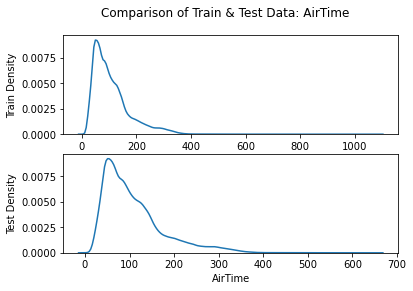

In [13]:
compararDensidad(X_train,X_test, 'AirTime')

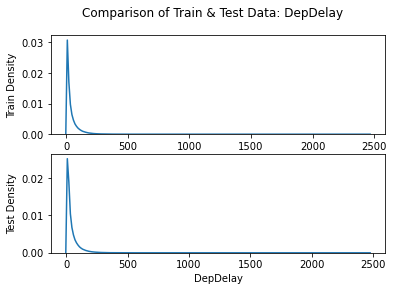

In [14]:
compararDensidad(X_train,X_test, 'DepDelay')

Al comparar la desidad de algunas variables individuales en el dataset de entrenamiento y en el de test, podemos observar que las distirbuciones ara casi identicas.

***
## Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

#### pipeline

In [15]:
num_columns = ['DayOfMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime','CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'DepDelay', 
       'Distance', 'TaxiIn', 'TaxiOut', 
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']

cat_columns = ['TailNum', 'CancellationCode', 
               'UniqueCarrier', 'Origin', 'Dest']

bin_columns = ['Cancelled', 'Diverted' ] # Separamos las binarias de las otras categorias.

In [16]:
# Pipeline para atributos numericos: - Estandarització: StandardScaler()

num_pipe = Pipeline([('scaler', StandardScaler())])

# Pipeline para atributos categoricas: - OneHotEncoding
# Por las variables categóricas multiclase queremos codificar los missing values como todo ceros
# (utilizando 'handle_unknown'). Por otro lado para las binaries, queremos generar una sola columna
# (utilizando 'drop'). Pero 'handle_unknown' y 'drop' son incompatibles entre ellas, por eso
# preprocesamos las binaries utilizando un pipeline diferente.

cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse=True, handle_unknown='ignore' ))])

bin_pipe = Pipeline([('ohe', OneHotEncoder(sparse=True, drop='if_binary' ))])

In [17]:
# Combinem els tres pipelines
preprocessor = ColumnTransformer(transformers=[
                                               ('num_transf', num_pipe, num_columns),
                                               ('cat_transf', cat_pipe, cat_columns),
                                               ('bin_transf', bin_pipe, bin_columns)
                                               ])

set_config('diagram')
preprocessor

ColumnTransformer(transformers=[('num_transf',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['DayOfMonth', 'DayOfWeek', 'DepTime',
                                  'CRSDepTime', 'ArrTime', 'CRSArrTime',
                                  'ActualElapsedTime', 'CRSElapsedTime',
                                  'AirTime', 'DepDelay', 'Distance', 'TaxiIn',
                                  'TaxiOut', 'CarrierDelay', 'WeatherDelay',
                                  'NASDelay', 'SecurityDelay',
                                  'LateAircraftDelay']),
                                ('cat_transf',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['TailNum', 'CancellationCode',
                                  'UniqueCarrier', 'Origin', 'Dest']),
                                ('bin_transf',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['Cancelled', 'Diverted'])])

In [18]:
# Aplicamos el prepocesamiento: fit_transform sobre el train set, transform sobre el test set

X_train = preprocessor.fit_transform(X_train);
X_test = preprocessor.transform(X_test)

In [19]:
#Cuales son las nuevas columnas dummy

new_ohe_columns = preprocessor.named_transformers_['cat_transf']['ohe'].get_feature_names_out(cat_columns).tolist()\
+ preprocessor.named_transformers_['bin_transf']['ohe'].get_feature_names_out(bin_columns).tolist()

In [20]:
new_num_columns=num_columns
new_columns = new_num_columns + new_ohe_columns  ### ahora lo revisamos



print(f'Number of columns after preprocessing: {len(new_columns)}')
print(f'Number of Numerical columns after preprocessing: {len(new_num_columns)}')
print(f'Number of OneHotEncoding columns after preprocessing: {len(new_ohe_columns)}')


Number of columns after preprocessing: 6013
Number of Numerical columns after preprocessing: 18
Number of OneHotEncoding columns after preprocessing: 5995


***
## Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [21]:
# Convertimos les matrizea (sparse) de nuevo en DataFrames
df_new_X_train = pd.DataFrame.sparse.from_spmatrix(X_train, columns=new_columns)
df_new_X_test = pd.DataFrame.sparse.from_spmatrix(X_test, columns=new_columns)

# convertinos las columnas numericas (19 cols) a formato dense para trabajar más facilmente con ellas.
## les columnas categoricas las dejamos igual por limitación de memoria.
df_new_X_train[new_num_columns] = df_new_X_train[new_num_columns].sparse.to_dense() 
df_new_X_test[new_num_columns] = df_new_X_test[new_num_columns].sparse.to_dense()

Funcion para resumir información de los datos de las nuevas columnas, por un lado las columnas numéricas y por otro las categoricas(dummmy, ohe)

In [22]:
# Resumen nuevas columnas.
def resumen_columnas(df, num_columns, dummy_columns):
    '''Resumen columnas numericas: describe más sumario Resumen dummy columnas. Valores 0 y 1'''
    
    if len(num_columns) != 0:
        
        print(colored('Resumen columnas numéricas: ','blue',attrs=['bold','underline']))
        resumen = df[num_columns].describe().T
        resumen['missing'] = df[num_columns].isna().sum()
        display(resumen)

        plt.subplots(figsize=(60, 20));
        b = sns.boxplot(data=df[num_columns], orient='h');
        b.axes.set_title("Cajas y bigotes de las Columnas nméricas",fontsize=25);
        b.set_ylabel("Columnas",fontsize=25);
        b.tick_params(labelsize=25);
        plt.show()

    if len(dummy_columns) !=0:
        print(f'\n-------------------------------------------------------\n')

        print(colored('Resumen columnas dummy: \n','green',attrs=['bold','underline']))

        print(f'Número de columnas dummy: {len(dummy_columns)}')

        resumen = pd.DataFrame()
        print(f"\nNumero de 0 y 1 por dummy columnas: ")
        resumen['Numero_de_1s_por_columna'] = df[dummy_columns].sum(axis=0)
        resumen['Numero_de_0s_por_columna'] =  df.shape[0] - resumen['Numero_de_1s_por_columna']

        display(resumen.describe().T)

        f, ax = plt.subplots(figsize=(25, 15))
        ax.set_xscale("log")
        b = sns.boxplot(data=resumen, x='Numero_de_1s_por_columna')
        b.axes.set_title("Boxplot distribution of 1's per column",fontsize=15);
        plt.show()

TEST
Resumen columnas numéricas: 


,count,mean,std,min,25%,50%,75%,max,missing
DayOfMonth,1355730.0,7.064760e-16,1.000000,-1.682064,-0.884556,0.026882,0.824391,1.735829,0
DayOfWeek,1355730.0,-1.787398e-15,1.000000,-1.494803,-0.993895,0.007922,1.009738,1.510646,0
DepTime,1355730.0,1.042013e-16,1.000000,-3.368193,-0.700587,0.058416,0.846270,1.955923,0
CRSDepTime,1355730.0,1.483580e-16,1.000000,-3.453730,-0.782665,0.099845,0.817621,2.097849,0
ArrTime,1350709.0,3.111288e-16,1.000000,-2.932192,-0.535585,0.191598,0.767512,1.440020,5021
CRSArrTime,1355730.0,-1.622528e-16,1.000000,-3.516196,-0.665599,0.154082,0.818862,1.647149,0
ActualElapsedTime,1349822.0,-1.023500e-16,1.000000,-1.641648,-0.739584,-0.239979,0.440039,13.610180,5908
CRSElapsedTime,1355585.0,2.830830e-18,1.000000,-2.232920,-0.733004,-0.256396,0.430482,7.369344,145
AirTime,1349822.0,5.517035e-17,1.000000,-1.577079,-0.732155,-0.265990,0.418690,14.316234,5908
DepDelay,1355730.0,-6.152028e-16,1.000000,-0.696967,-0.584514,-0.359610,0.183910,45.239821,0


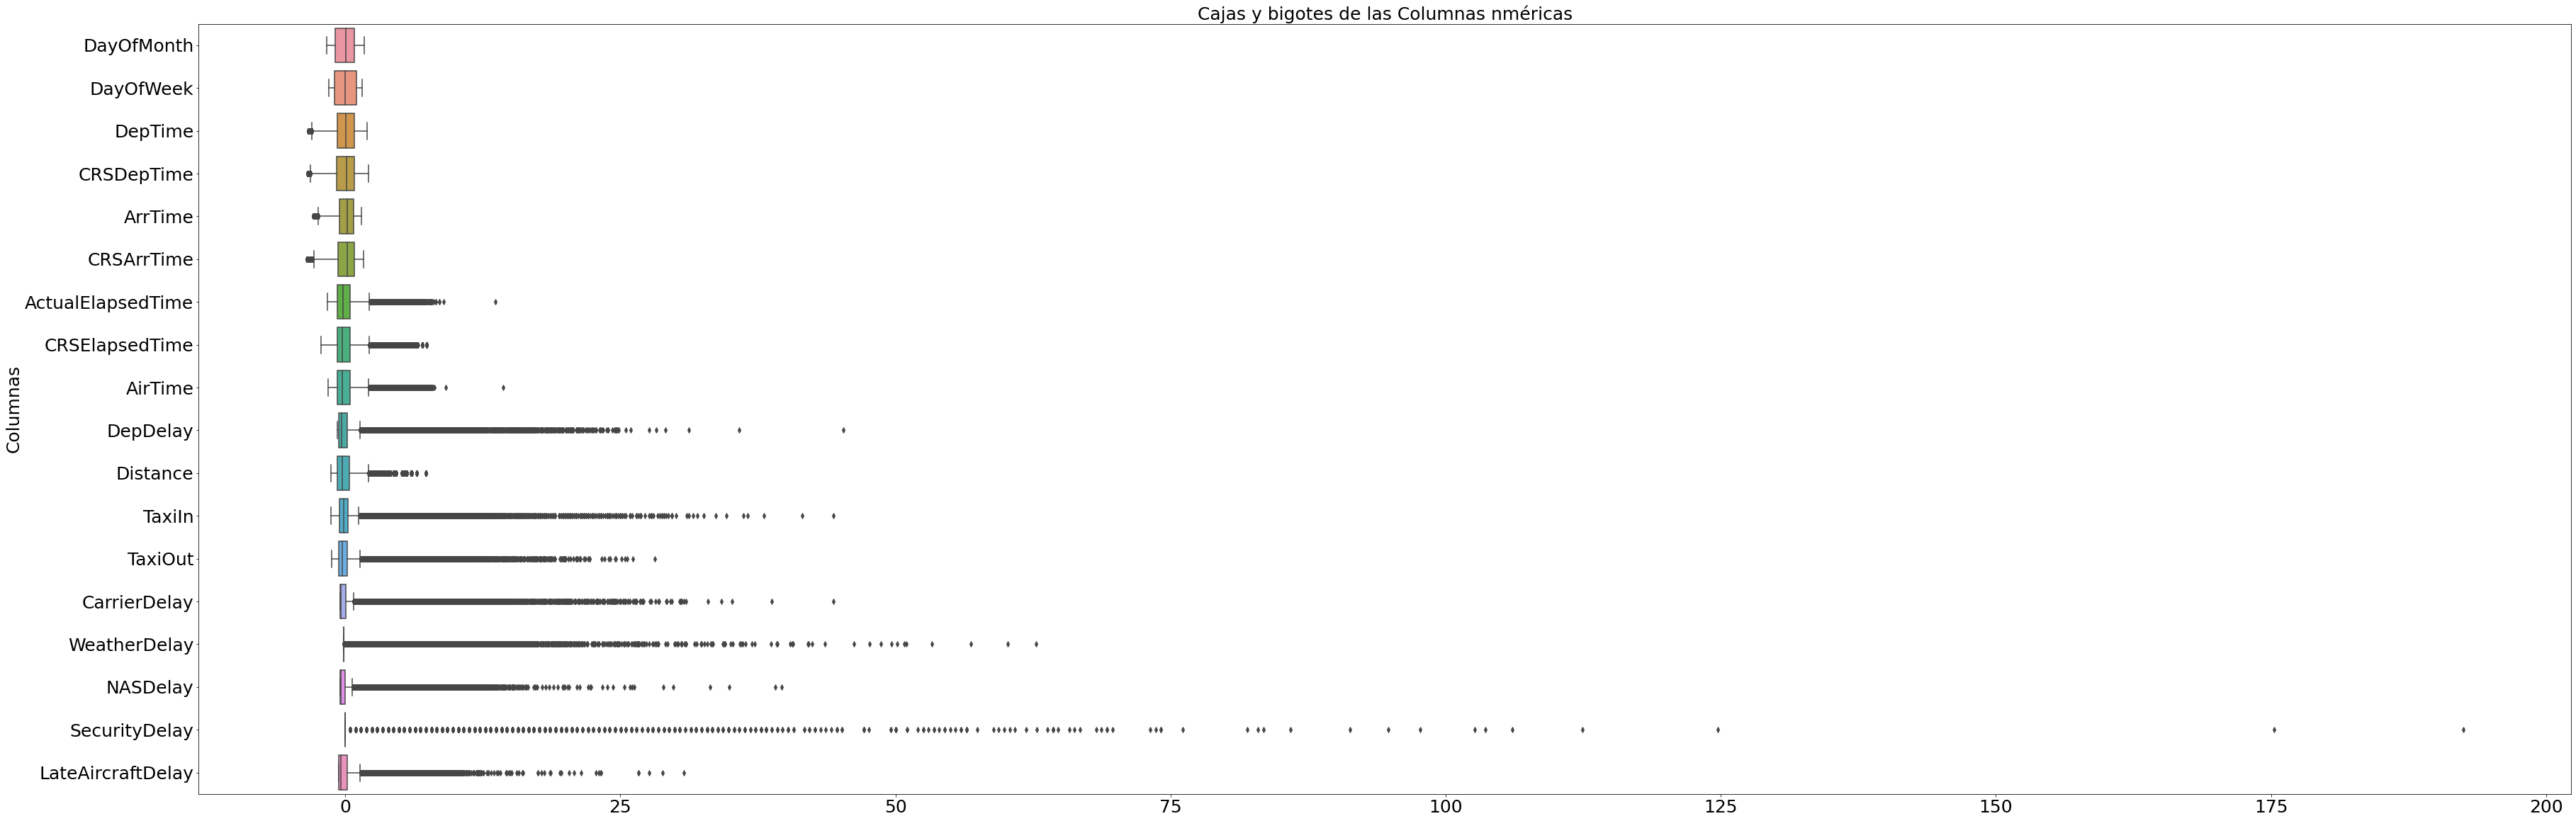


-------------------------------------------------------

Resumen columnas dummy: 

Número de columnas dummy: 5995

Numero de 0 y 1 por dummy columnas: 


,count,mean,std,min,25%,50%,75%,max
Numero_de_1s_por_columna,5995.0,1.131703e+03,18540.821687,1.0,176.0,254.0,348.5,1355278.0
Numero_de_0s_por_columna,5995.0,1.354598e+06,18540.821687,452.0,1355381.5,1355476.0,1355554.0,1355729.0


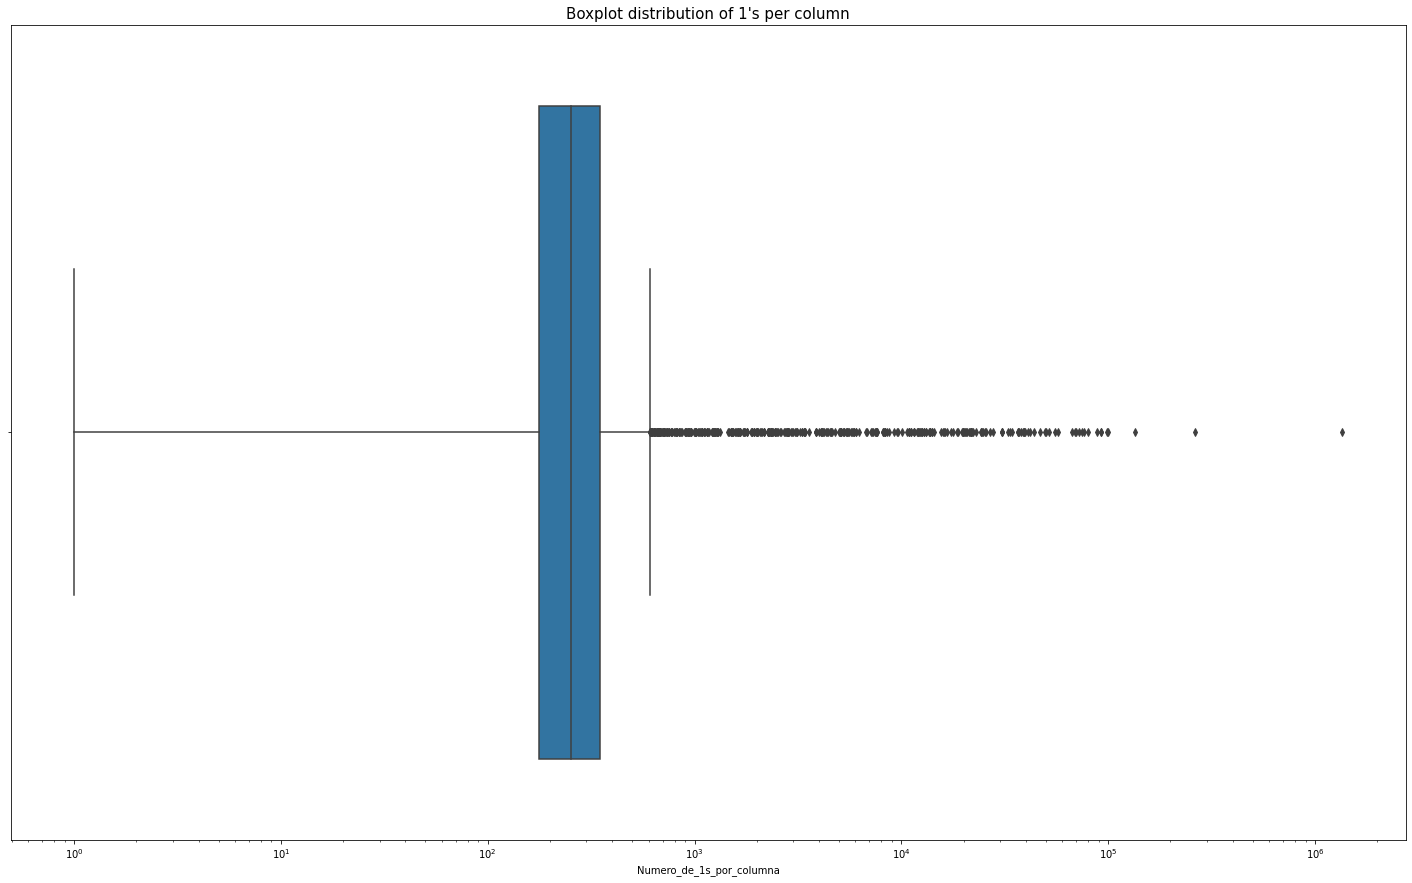

In [26]:
print(colored('TRAIN',attrs=['bold','underline','reverse']))
resumen_columnas(df_new_X_train,num_columns,new_ohe_columns)

TEST
Resumen columnas numéricas: 


,count,mean,std,min,25%,50%,75%,max,missing
DayOfMonth,581028.0,-0.004016,0.999590,-1.682064,-0.884556,0.026882,0.824391,1.735829,0
DayOfWeek,581028.0,0.001071,0.999320,-1.494803,-0.993895,0.007922,1.009738,1.510646,0
DepTime,581028.0,-0.001066,0.999215,-3.368193,-0.700587,0.058416,0.846270,1.955923,0
CRSDepTime,581028.0,-0.000789,0.998765,-3.453730,-0.782665,0.099845,0.817621,2.097849,0
ArrTime,578939.0,0.001634,0.996871,-2.932192,-0.533763,0.191598,0.765690,1.440020,2089
CRSArrTime,581028.0,-0.001118,0.998707,-3.516196,-0.665599,0.151930,0.816711,1.647149,0
ActualElapsedTime,578549.0,0.000635,1.000145,-1.655526,-0.739584,-0.239979,0.440039,9.113736,2479
CRSElapsedTime,580975.0,0.000568,1.000191,-1.868455,-0.733004,-0.256396,0.430482,7.369344,53
AirTime,578549.0,0.000885,0.999873,-1.577079,-0.732155,-0.265990,0.418690,7.950168,2479
DepDelay,581028.0,-0.000133,1.002907,-0.696967,-0.584514,-0.359610,0.183910,45.427241,0


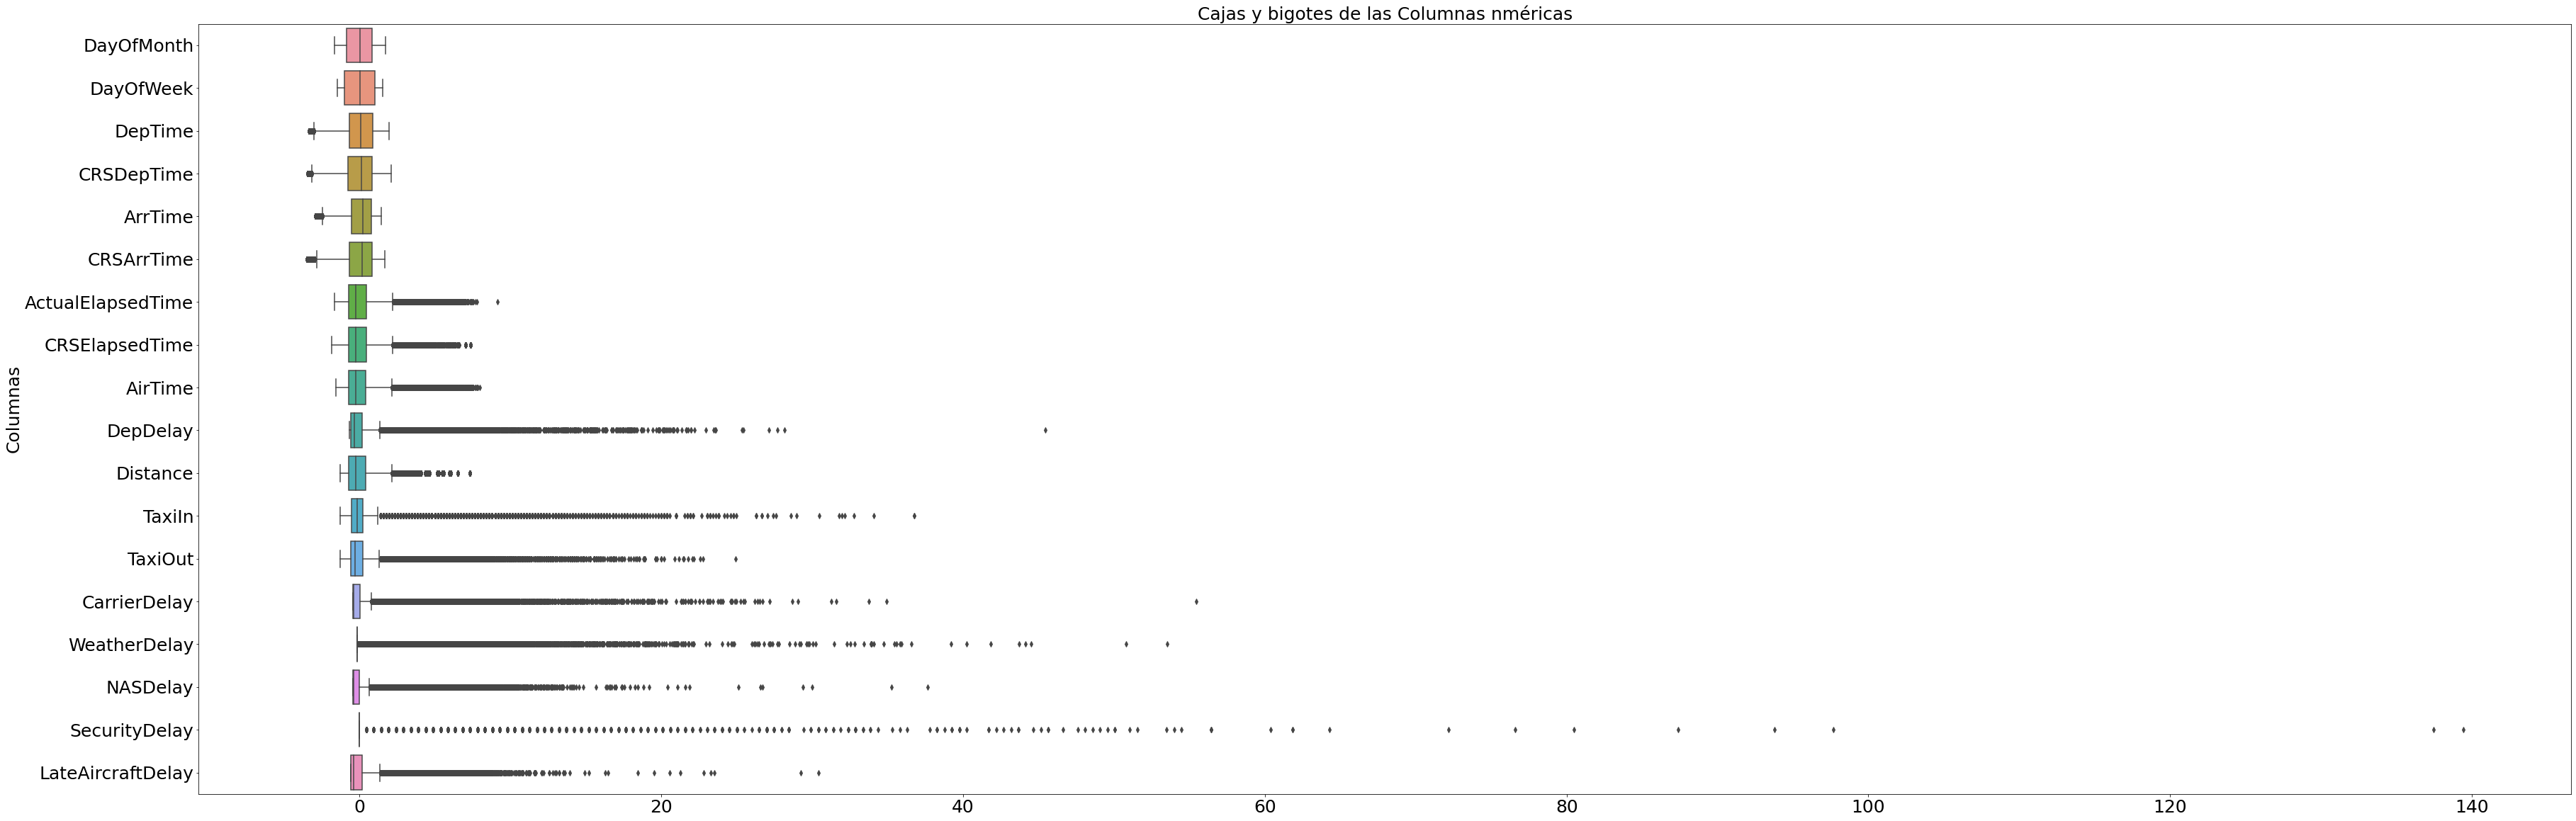


-------------------------------------------------------

Resumen columnas dummy: 

Número de columnas dummy: 5995

Numero de 0 y 1 por dummy columnas: 


,count,mean,std,min,25%,50%,75%,max
Numero_de_1s_por_columna,5995.0,485.006172,7946.332232,0.0,75.0,109.0,151.0,580847.0
Numero_de_0s_por_columna,5995.0,580542.993828,7946.332232,181.0,580877.0,580919.0,580953.0,581028.0


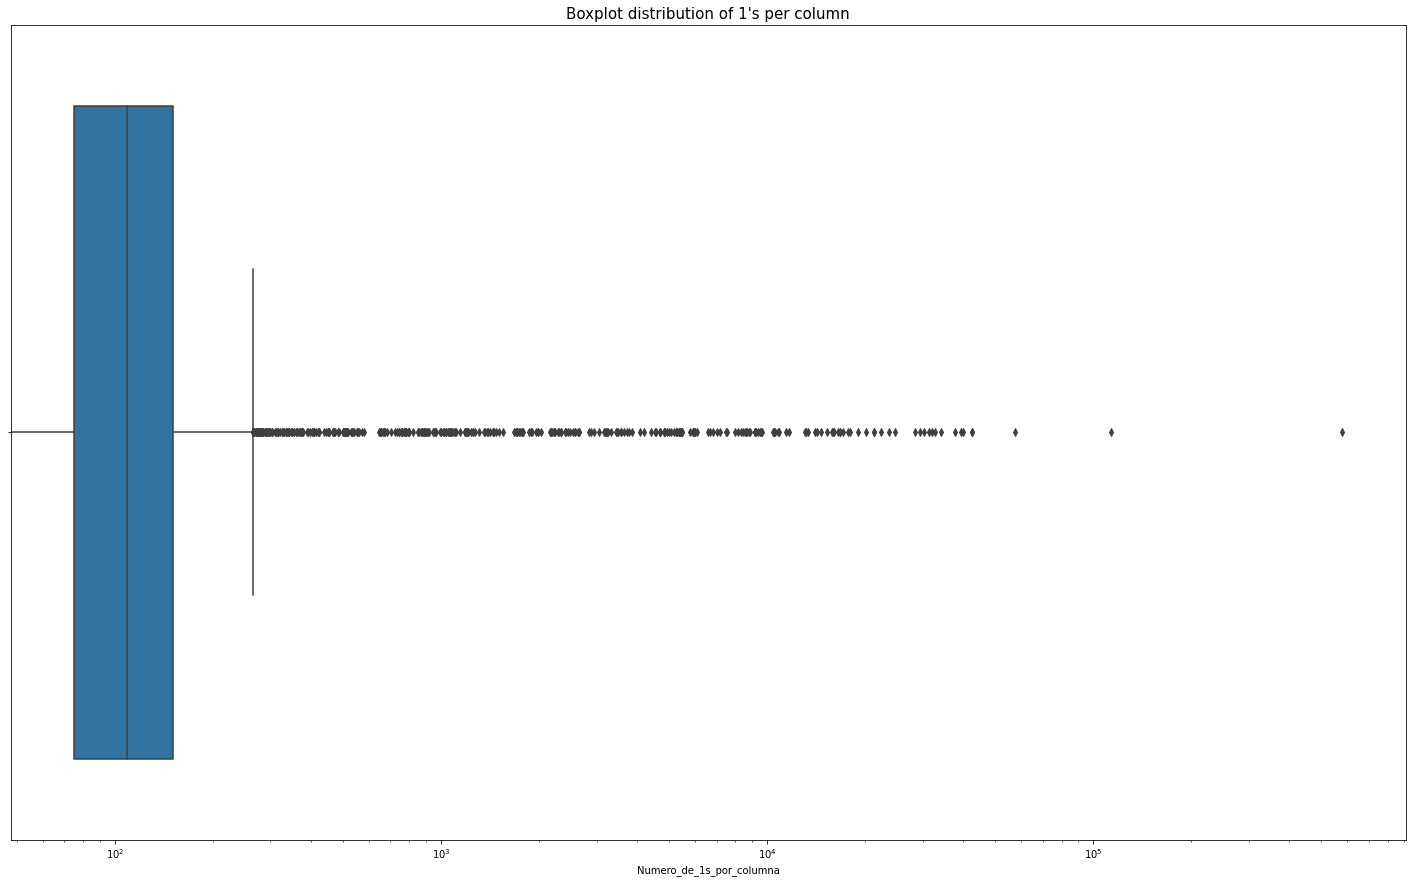

In [27]:
print(colored('TEST',attrs=['bold','underline','reverse']))
resumen_columnas(df_new_X_test,num_columns,new_ohe_columns)

***

In [29]:
import session_info
session_info.show()

***